In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Funcion de activacion sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivada de la funcion sigmoide
def sigmoid_derivative(x):
    return x * (1 - x)

# Red neuronal
class RedNeuronal:
    def __init__(self, tamano_entrada, tamano_oculto, tamano_salida):
        self.tamano_entrada = tamano_entrada
        self.tamano_oculto = tamano_oculto
        self.tamano_salida = tamano_salida
        
        # Inicializacion de los pesos
        self.pesos_entrada_oculta = np.random.randn(self.tamano_entrada, self.tamano_oculto)
        self.pesos_oculta_salida = np.random.randn(self.tamano_oculto, self.tamano_salida)
        
        # Inicializacion de los sesgos
        self.sesgo_oculto = np.random.randn(1, self.tamano_oculto)
        self.sesgo_salida = np.random.randn(1, self.tamano_salida)

    def forward(self, X):
        # Propagacion hacia adelante
        self.ent_oculta = np.dot(X, self.pesos_entrada_oculta) + self.sesgo_oculto
        self.sal_oculta = sigmoid(self.ent_oculta)
        self.ent_salida = np.dot(self.sal_oculta, self.pesos_oculta_salida) + self.sesgo_salida
        self.sal_salida = sigmoid(self.ent_salida)
        return self.sal_salida
    
    def backward(self, X, y, tasa_aprendizaje):
        # Calcular el error
        error_salida = y - self.sal_salida
        delta_salida = error_salida * sigmoid_derivative(self.sal_salida)
        
        # Error en la capa oculta
        error_oculta = delta_salida.dot(self.pesos_oculta_salida.T)
        delta_oculta = error_oculta * sigmoid_derivative(self.sal_oculta)
        
        # Actualizar los pesos
        self.pesos_entrada_oculta += X.T.dot(delta_oculta) * tasa_aprendizaje
        self.pesos_oculta_salida += self.sal_oculta.T.dot(delta_salida) * tasa_aprendizaje
        
        # Actualizar los sesgos
        self.sesgo_oculto += np.sum(delta_oculta, axis=0, keepdims=True) * tasa_aprendizaje
        self.sesgo_salida += np.sum(delta_salida, axis=0, keepdims=True) * tasa_aprendizaje
    
    def train(self, X, y, epocas, tasa_aprendizaje):
        for epoca in range(epocas):
            self.forward(X)
            self.backward(X, y, tasa_aprendizaje)
            
            # Imprimir la perdida cada 100 epocas
            if epoca % 100 == 0:
                # Error cuadratico medio
                perdida = np.mean(np.square(y - self.sal_salida))  
                print(f'Epoca {epoca} - Perdida: {perdida}')

# Preprocesar las imagenes para la red neuronal
def preprocess_image(image_path, size=(600, 800)):
    # Cargar la imagen y redimensionarla
    img = cv2.imread(image_path)
    img = cv2.resize(img, size)
    # Convertir a escala de grises
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
    # Normalizar
    img = img / 255.0  
    # Convertir en vector
    return img.flatten()  

# Funcion para generar imagenes aleatorias simulando no sean iguales
def generar_imagenes_no_relacionadas(cantidad=15, tamaño=(600, 800)):
    X_no_relacionadas = []
    y_no_relacionadas = []
    
    for i in range(1, cantidad + 1):
        # Crear una imagen aleatoria de 600x800 con valores de pixeles entre 0 y 255
        img = np.random.randint(0, 256, (tamaño[0], tamaño[1]), dtype=np.uint8)
        
        # Convertir la imagen a un vector para la red neuronal
        img_flat = img.flatten()
        
        # Agregar la imagen al conjunto de datos
        X_no_relacionadas.append(img_flat)
        # Etiqueta 0 (no es la persona entrenada)
        y_no_relacionadas.append([0])

    # Convertir a arrays de NumPy
    X_no_relacionadas = np.array(X_no_relacionadas)
    y_no_relacionadas = np.array(y_no_relacionadas)

    return X_no_relacionadas, y_no_relacionadas

# Cargar las imagenes de entrenamiento
X_train = []
y_train = []

for i in range(1, 11):
    img = preprocess_image(f'captura{i}.jpg')
    X_train.append(img)
    # Etiqueta 1 (persona entrenada)
    y_train.append([1])  

# Generar las imagenes no relacionadas
X_no_relacionadas, y_no_relacionadas = generar_imagenes_no_relacionadas()

# Agregar las imagenes no relacionadas al conjunto de entrenamiento
X_train.extend(X_no_relacionadas)
y_train.extend(y_no_relacionadas)

# Convertir listas a matrices
X_train = np.array(X_train)
y_train = np.array(y_train)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Inicializar la red neuronal
# El numero de neuronas de entrada es el numero de pixeles
input_size = X_train.shape[1] 
# Numero de neuronas en la capa oculta
hidden_size = 50
# Una neurona de salida
output_size = 1 

# Crear la red neuronal
nn = RedNeuronal(input_size, hidden_size, output_size)

# Entrenar la red neuronal
# Numero de epocas
epochs = 500  
#Numero tasa de aprendizaje 10%
learning_rate = 0.1
#Comenzar entrenamiento
nn.train(X_train, y_train, epochs, learning_rate)

# Evaluar el rendimiento de la red en el conjunto de prueba
y_pred = nn.forward(X_test)
# Redondear a 0 o 1 para la prediccion
y_pred = np.round(y_pred)  

# Calcular la precision
precision = np.mean(y_pred == y_test)
print(f'Precision: {precision * 100}%')


C:\Users\RDragon197\AppData\Local\Temp\ipykernel_10272\1236074887.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoca 0 - Perdida: 0.4408906066288483
Epoca 100 - Perdida: 0.007662030967417613
Epoca 200 - Perdida: 0.0031259057764966803
Epoca 300 - Perdida: 0.001955195970058995
Epoca 400 - Perdida: 0.0014210771559762696
Precision: 100.0%


C:\Users\RDragon197\AppData\Local\Temp\ipykernel_10272\2596756711.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f'Etiqueta de prediccion: {int(y_pred[img_idx])}, Real: {int(y_test[img_idx])}')


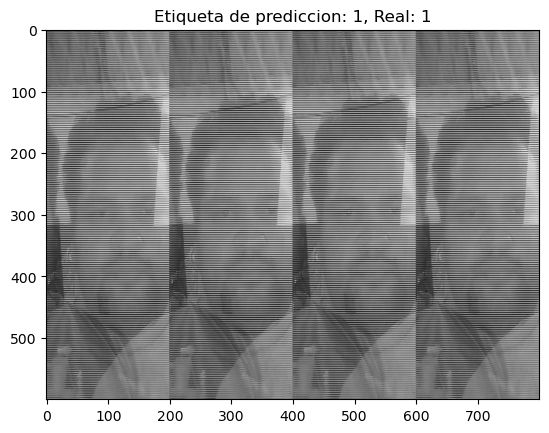

In [11]:
# Visualizar una imagen de prueba
img_idx = 0
img = X_test[img_idx].reshape(600, 800)
plt.imshow(img, cmap='gray')
plt.title(f'Etiqueta de prediccion: {int(y_pred[img_idx])}, Real: {int(y_test[img_idx])}')
plt.show()

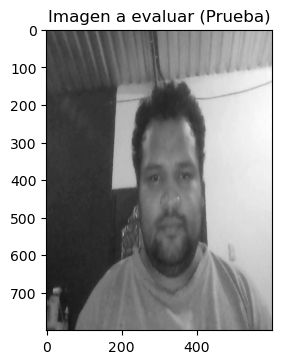

La imagen captura2.jpg es la persona entrenada (prediccion: 0.96)


In [12]:
# Funcion para probar con una nueva imagen
def probar_imagen(modelo, image_path, size=(600, 800)):
    # Preprocesar la nueva imagen
    img = preprocess_image(image_path, size)
    
    # Realizar la prediccion
    prediccion = modelo.forward(np.array([img]))
    
    # Interpretar la salida
    if prediccion >= 0.5:
        print(f'La imagen {image_path} es la persona entrenada (prediccion: {prediccion[0][0]:.2f})')
    else:
        print(f'La imagen {image_path} NO es la persona entrenada (prediccion: {prediccion[0][0]:.2f})')

# Leer imagen de prueba para imprimir
image_path = 'captura2.jpg'
img2 = cv2.imread(image_path)
img2 = cv2.resize(img2, dsize=(600, 800))
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)  # Convertir a escala de grises
    
plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title("Imagen a evaluar (Prueba)")
plt.show()

# Usar la funcion para probar con una nueva imagen
probar_imagen(nn, image_path)

